In [8]:
# Load Dataset
import pandas as pd

df = pd.read_csv("data/fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
# Check size
df.shape

(6362620, 11)

In [10]:
# Data Understanding (EDA)

In [11]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            str    
 2   amount          float64
 3   nameOrig        str    
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        str    
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), str(3)
memory usage: 534.0 MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# Data Cleaning
df.fillna(0, inplace=True)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [13]:
# Remove Unnecessary Columns
df.drop(["nameOrig","nameDest"], axis=1, inplace=True)

<Axes: ylabel='amount'>

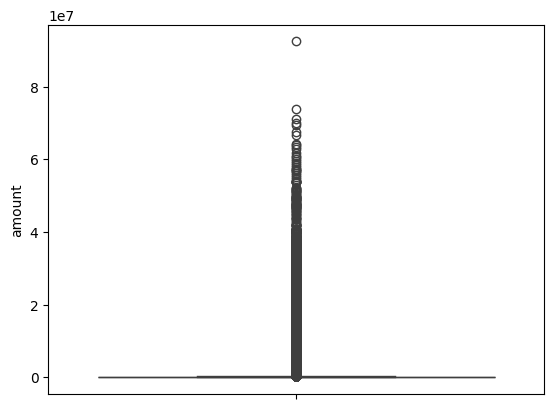

In [14]:
# Outlier Analysis
import seaborn as sns
sns.boxplot(df["amount"])

<Axes: >

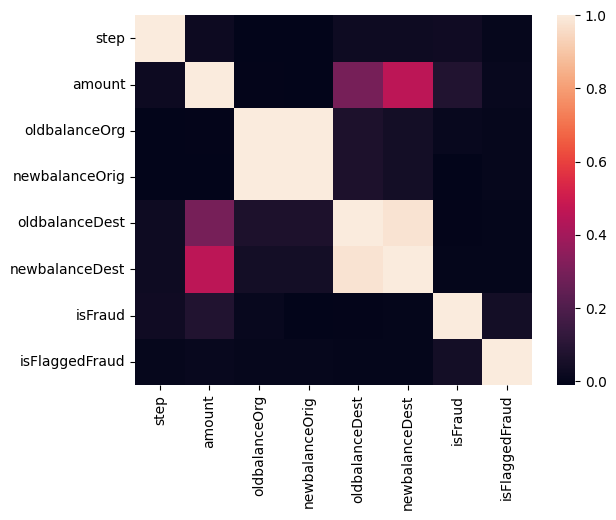

In [18]:
# Multicollinearity
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr)

In [16]:
# Exploratory Data Analysis (EDA)
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

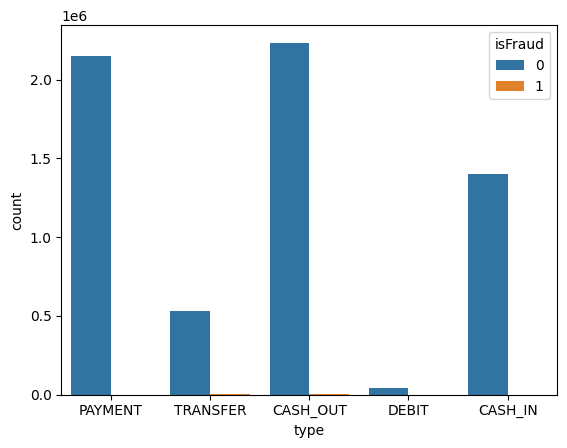

In [17]:
# Fraud by Transaction Type
sns.countplot(x="type", hue="isFraud", data=df)

<Axes: xlabel='amount', ylabel='Count'>

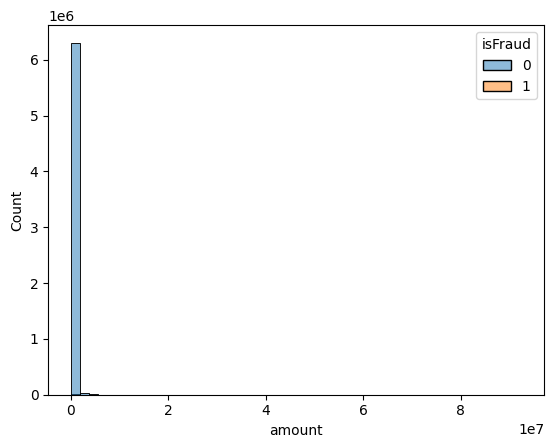

In [19]:
# Fraud vs Amount
sns.histplot(data=df, x="amount", hue="isFraud", bins=50)

In [20]:
# Feature Engineering
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [21]:
# Encode transaction type:
df = pd.get_dummies(df, columns=["type"], drop_first=True)

In [24]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X = df.drop("isFraud", axis=1)
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
# Handle Imbalanced Data
from imblearn.over_sampling import SMOTE

In [ ]:
# Build Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

In [ ]:
# Variable Selection
model.feature_importances_

In [ ]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Key Fraud Factors
importance = model.feature_importances_
features = X.columns

pd.Series(importance, index=features).sort_values(ascending=False)